[-838.91653573  874.77218869 -148.02324342]
E=0.0


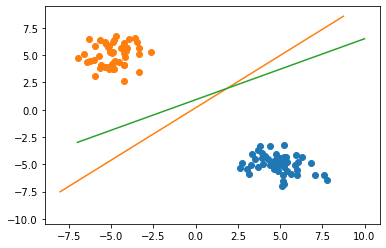

In [10]:
#(a)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
#感知机学习算法
def Percetron_Learning(X,y,learning_rate):
    m,n=X.shape
    w_record=[]
    X=np.column_stack((X,np.ones(m)))
    w=np.random.random(n+1)
    w_record.append(w.copy())
    iter=0
    while iter <= 100:
        i=np.random.randint(m)
        if y[i]*(w.dot(X[i,:])) <= 1: #perceptron没有二重循环
            # print(w.dot(X[i,:]))
            diff = y[i] - w.dot(X[i,:])
            # print(diff)
            w = w + learning_rate * diff * X[i,:]
            # w_record.append(w.copy())
            iter+=1
            # print("第"+str(iter)+"次修正")
            continue
        predict=sgn(X,w) #后面这里是收敛条件
        if np.all(predict==y):
            break
    return w,w_record
 
#指示函数
def sgn(X,w):
    predict=np.dot(X,w)
    predict[predict>0]=1
    predict[predict<0]=-1
    predict[predict==0]=0
    return predict
 
N = 100
mean1 = [5,-5]
cov1 = [[1,0],[0,1]]
mean2 = (-5,5)
cov2 = [[1,0],[0,1]]
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)

#PLA算法求系数
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = Percetron_Learning(X,y,100)

fig, ax = plt.subplots()
ax.scatter(X1[:,0],X1[:,1])
ax.scatter(X2[:,0],X2[:,1])
x = np.arange(X.min()-1,X.max()+1,0.01)
w0 = w_record[0]
line, = ax.plot(x, (-w0[0]*x-w0[2])/w0[1])
 
def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,
 
def animate(i):
    if i == len(w_record):
        return
    w = w_record[i]
    line.set_ydata((-w[0]*x-w[2])/w[1])  # update the data.
    return line,
 
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=2, blit=True, save_count=50)
ax.plot(x,(-w[0]*x-w[2])/w[1])
print(w)
ax.plot([-7,10],[-3.0,6.5])

#Test set
N = 10000
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)
X = np.row_stack((X1,X2))
X=np.column_stack((X,np.ones(N)))
y = np.ones(N)
E = 0
y[0:N//2] = -1
for i in range(N):
    f = w.dot(X[i,:])
    # print(f)
    if f * y[i] < 0:
        E += 1
E = E / N
print(f"E={E}")

[-14.47935335  15.67746553  -2.66426177]
E=0.0


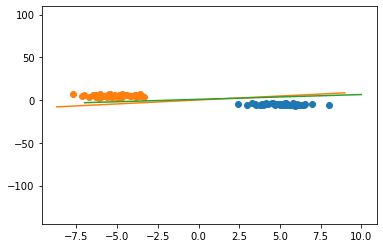

In [11]:
#(b)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
learning_rate = 1
  
#感知机学习算法
def Percetron_Learning(X,y,learning_rate):
    m,n=X.shape
    w_record=[]
    X=np.column_stack((X,np.ones(m)))
    w=np.random.random(n+1)
    w_record.append(w.copy())
    iter=0
    while iter <= 100:
        i=np.random.randint(m)
        if y[i]*(w.dot(X[i,:])) <= 1: #perceptron没有二重循环
            # print(w.dot(X[i,:]))
            diff = y[i] - w.dot(X[i,:])
            # print(diff)
            w = w + learning_rate * diff * X[i,:]
            # w_record.append(w.copy())
            iter+=1
            # print("第"+str(iter)+"次修正")
            continue
        predict=sgn(X,w) #后面这里是收敛条件
        if np.all(predict==y):
            break
    return w,w_record
 
#指示函数
def sgn(X,w):
    predict=np.dot(X,w)
    predict[predict>0]=1
    predict[predict<0]=-1
    predict[predict==0]=0
    return predict
 
N = 100
mean1 = [5,-5]
cov1 = [[1,0],[0,1]]
mean2 = (-5,5)
cov2 = [[1,0],[0,1]]
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)

#PLA算法求系数
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = Percetron_Learning(X,y,learning_rate)

fig, ax = plt.subplots()
ax.scatter(X1[:,0],X1[:,1])
ax.scatter(X2[:,0],X2[:,1])
x = np.arange(X.min()-1,X.max()+1,0.01)
w0 = w_record[0]
line, = ax.plot(x, (-w0[0]*x-w0[2])/w0[1])
 
def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,
 
def animate(i):
    if i == len(w_record):
        return
    w = w_record[i]
    line.set_ydata((-w[0]*x-w[2])/w[1])  # update the data.
    return line,
 
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=2, blit=True, save_count=50)
ax.plot(x,(-w[0]*x-w[2])/w[1])
print(w)
ax.plot([-7,10],[-3.0,6.5])

#Test set
N = 10000
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)
X = np.row_stack((X1,X2))
X=np.column_stack((X,np.ones(N)))
y = np.ones(N)
E = 0
y[0:N//2] = -1
for i in range(N):
    f = w.dot(X[i,:])
    # print(f)
    if f * y[i] < 0:
        E += 1
E = E / N
print(f"E={E}")

[0.31313596 0.77708224 0.41304423]
E=0.0058


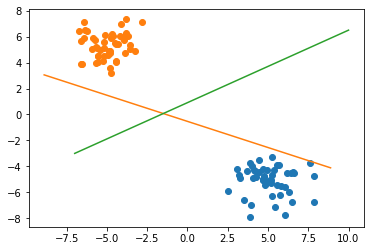

In [15]:
#(c)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
learning_rate = 0.01
  
#感知机学习算法
def Percetron_Learning(X,y,learning_rate):
    m,n=X.shape
    w_record=[]
    X=np.column_stack((X,np.ones(m)))
    w=np.random.random(n+1)
    w_record.append(w.copy())
    iter=0
    while iter <= 100:
        i=np.random.randint(m)
        if y[i]*(w.dot(X[i,:])) <= 1: #perceptron没有二重循环
            # print(w.dot(X[i,:]))
            diff = y[i] - w.dot(X[i,:])
            # print(diff)
            w = w + learning_rate * diff * X[i,:]
            # w_record.append(w.copy())
            iter+=1
            # print("第"+str(iter)+"次修正")
            continue
        predict=sgn(X,w) #后面这里是收敛条件
        if np.all(predict==y):
            break
    return w,w_record
 
#指示函数
def sgn(X,w):
    predict=np.dot(X,w)
    predict[predict>0]=1
    predict[predict<0]=-1
    predict[predict==0]=0
    return predict
 
N = 100
mean1 = [5,-5]
cov1 = [[1,0],[0,1]]
mean2 = (-5,5)
cov2 = [[1,0],[0,1]]
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)

#PLA算法求系数
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = Percetron_Learning(X,y,learning_rate)

fig, ax = plt.subplots()
ax.scatter(X1[:,0],X1[:,1])
ax.scatter(X2[:,0],X2[:,1])
x = np.arange(X.min()-1,X.max()+1,0.01)
w0 = w_record[0]
line, = ax.plot(x, (-w0[0]*x-w0[2])/w0[1])
 
def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,
 
def animate(i):
    if i == len(w_record):
        return
    w = w_record[i]
    line.set_ydata((-w[0]*x-w[2])/w[1])  # update the data.
    return line,
 
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=2, blit=True, save_count=50)
ax.plot(x,(-w[0]*x-w[2])/w[1])
print(w)
ax.plot([-7,10],[-3.0,6.5])

#Test set
N = 10000
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)
X = np.row_stack((X1,X2))
X=np.column_stack((X,np.ones(N)))
y = np.ones(N)
E = 0
y[0:N//2] = -1
for i in range(N):
    f = w.dot(X[i,:])
    # print(f)
    if f * y[i] < 0:
        E += 1
E = E / N
print(f"E={E}")

[0.69816039 0.7881055  0.36964395]
E=0.3415


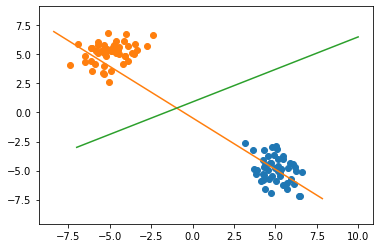

In [16]:
#(d)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
learning_rate = 0.0001
  
#感知机学习算法
def Percetron_Learning(X,y,learning_rate):
    m,n=X.shape
    w_record=[]
    X=np.column_stack((X,np.ones(m)))
    w=np.random.random(n+1)
    w_record.append(w.copy())
    iter=0
    while iter <= 100:
        i=np.random.randint(m)
        if y[i]*(w.dot(X[i,:])) <= 1: #perceptron没有二重循环
            # print(w.dot(X[i,:]))
            diff = y[i] - w.dot(X[i,:])
            # print(diff)
            w = w + learning_rate * diff * X[i,:]
            # w_record.append(w.copy())
            iter+=1
            # print("第"+str(iter)+"次修正")
            continue
        predict=sgn(X,w) #后面这里是收敛条件
        if np.all(predict==y):
            break
    return w,w_record
 
#指示函数
def sgn(X,w):
    predict=np.dot(X,w)
    predict[predict>0]=1
    predict[predict<0]=-1
    predict[predict==0]=0
    return predict
 
N = 100
mean1 = [5,-5]
cov1 = [[1,0],[0,1]]
mean2 = (-5,5)
cov2 = [[1,0],[0,1]]
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)

#PLA算法求系数
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = Percetron_Learning(X,y,learning_rate)

fig, ax = plt.subplots()
ax.scatter(X1[:,0],X1[:,1])
ax.scatter(X2[:,0],X2[:,1])
x = np.arange(X.min()-1,X.max()+1,0.01)
w0 = w_record[0]
line, = ax.plot(x, (-w0[0]*x-w0[2])/w0[1])
 
def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,
 
def animate(i):
    if i == len(w_record):
        return
    w = w_record[i]
    line.set_ydata((-w[0]*x-w[2])/w[1])  # update the data.
    return line,
 
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=2, blit=True, save_count=50)
ax.plot(x,(-w[0]*x-w[2])/w[1])
print(w)
ax.plot([-7,10],[-3.0,6.5])

#Test set
N = 10000
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)
X = np.row_stack((X1,X2))
X=np.column_stack((X,np.ones(N)))
y = np.ones(N)
E = 0
y[0:N//2] = -1
for i in range(N):
    f = w.dot(X[i,:])
    # print(f)
    if f * y[i] < 0:
        E += 1
E = E / N
print(f"E={E}")

In [ ]:
#(e)
# E from (a),(b),(c) is always 0
# E from (d),(e) is 0.0058, 0.3415, which shows the result become worse